<a href="https://colab.research.google.com/github/agrin28/Train_Boxes_Data_Analysis_Jupyter_Notebook/blob/main/Neural_network_IMDB_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Загружаем библиотеки

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загружаем данные

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000 )

17473536/17464789 [==============================] - 0s 0us/step


Просмотр формата отзыва

In [8]:
print(x_train[9])

[1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 166, 12, 216, 125, 40, 6, 364, 352, 707, 1187, 39, 294, 11, 22, 396, 13, 28, 8, 202, 12, 1109, 23, 94, 2, 151, 111, 211, 469, 4, 20, 13, 258, 546, 1104, 7273, 12, 16, 38, 78, 33, 211, 15, 12, 16, 2849, 63, 93, 12, 6, 253, 106, 10, 10, 48, 335, 267, 18, 6, 364, 1242, 1179, 20, 19, 6, 1009, 7, 1987, 189, 5, 6, 8419, 7, 2723, 2, 95, 1719, 6, 6035, 7, 3912, 7144, 49, 369, 120, 5, 28, 49, 253, 10, 10, 13, 1041, 19, 85, 795, 15, 4, 481, 9, 55, 78, 807, 9, 375, 8, 1167, 8, 794, 76, 7, 4, 58, 5, 4, 816, 9, 243, 7, 43, 50]


In [9]:
y_train[9]

0

Посмотрим словарь слов

In [10]:
word_index=imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Сделаем реверсивный словарь

In [11]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

In [12]:
for i in range(1,31):
  print(i, '=', reverse_word_index[i]) # посмотри 30 самых популярных слов в отзывах

1 = the
2 = and
3 = a
4 = of
5 = to
6 = is
7 = br
8 = in
9 = it
10 = i
11 = this
12 = that
13 = was
14 = as
15 = for
16 = with
17 = movie
18 = but
19 = film
20 = on
21 = not
22 = you
23 = are
24 = his
25 = have
26 = he
27 = be
28 = one
29 = all
30 = at


Раскодируем рецензию

In [13]:
decoded_review=' '. join([reverse_word_index[i] for i in x_train[209]])
decoded_review

"the just its great was with door in realistic as you most br of appeal br of masterpieces and and and an show of setting to of and or of kane appeal to of white br of you for as you it an has of environment or of midnight and gary but impressed since i i take in only you'd location and it in and and when even and even fiend with in ms leather conclusion admirable to and suffice with in and and and apocalypse sixties are remember setting elm york goes my mother much i i of using it around german blood not that with much bit shootout site realism conventional anyone who and and difficulty brave language is say to hippie best in matter cast all them cat tv in another movie is and are is and know all and be inside ashamed film be makers annoy and and walker any in twenty made in at is and conventional discovering world does don't for art not best second board of revelation festival br of and end is wait film designs within any and low br of and movie is effect of ashamed he historical som

Проведем векторизацию текста отзыва в формате ONE HOT ENCODING

In [14]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1
  return results  

In [15]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [16]:
x_train[59] # посмотрим, как теперь выглядит формат отзыва

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
len(x_train[9123])

10000

In [18]:
x_train.shape

(25000, 10000)

Строим нейронную сеть

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', ))
model.add(layers.Dense(1, activation = 'sigmoid'))

Компилируемая модель

In [20]:
model.compile(optimizer='rmsprop',
                        loss = 'binary_crossentropy',
                        metrics=['accuracy'])

Обучаем модель

In [21]:
textmodel = model.fit(x_train,
                                    y_train,
                                    epochs=20,
                                    batch_size = 128,
                                    validation_split = 0.1)

Epoch 1/20
176/176 [==============================] - 3s 11ms/step - loss: 0.3547 - accuracy: 0.8551 - val_loss: 0.2709 - val_accuracy: 0.8940
Epoch 2/20
176/176 [==============================] - 2s 10ms/step - loss: 0.2088 - accuracy: 0.9187 - val_loss: 0.2759 - val_accuracy: 0.8932
Epoch 3/20
176/176 [==============================] - 2s 10ms/step - loss: 0.1663 - accuracy: 0.9374 - val_loss: 0.3136 - val_accuracy: 0.8844
Epoch 4/20
176/176 [==============================] - 2s 10ms/step - loss: 0.1393 - accuracy: 0.9495 - val_loss: 0.3465 - val_accuracy: 0.8860
Epoch 5/20
176/176 [==============================] - 2s 10ms/step - loss: 0.1204 - accuracy: 0.9569 - val_loss: 0.3756 - val_accuracy: 0.8776
Epoch 6/20
176/176 [==============================] - 2s 10ms/step - loss: 0.1027 - accuracy: 0.9619 - val_loss: 0.4116 - val_accuracy: 0.8764
Epoch 7/20
176/176 [==============================] - 2s 12ms/step - loss: 0.0910 - accuracy: 0.9672 - val_loss: 0.4378 - val_accuracy: 0.8812

Визуализируем процесс обучения

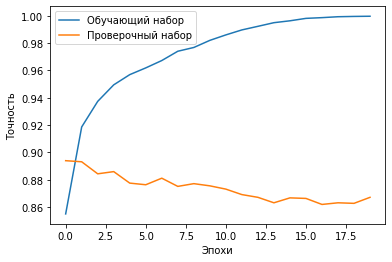

In [22]:
plt.plot(textmodel.history['accuracy'],
         label = 'Обучающий набор')
plt.plot(textmodel.history['val_accuracy'],
         label = 'Проверочный набор')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

Проверим качество нейросети на тестовом наборе

In [23]:
finalscore = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.6799 - accuracy: 0.8434
